In [38]:
import torch
from torch.distributions import multinomial
from d2l import torch as d2l

In [39]:
# 每个概率都是1/6
fair_probs = torch.ones([6]) / 6
# 简单例子方便理解estimates
counts =  multinomial.Multinomial(6, fair_probs).sample((6,))
cum_counts = counts.cumsum(dim=0)
cum_row_counts = cum_counts.cumsum(dim=1)
estimates = cum_counts / cum_counts.sum(dim=1,keepdim=True)
counts,cum_counts,cum_row_counts,estimates

(tensor([[2., 1., 1., 0., 1., 1.],
         [1., 1., 0., 0., 2., 2.],
         [0., 1., 0., 1., 2., 2.],
         [1., 0., 2., 3., 0., 0.],
         [1., 0., 2., 1., 2., 0.],
         [1., 0., 1., 1., 3., 0.]]),
 tensor([[ 2.,  1.,  1.,  0.,  1.,  1.],
         [ 3.,  2.,  1.,  0.,  3.,  3.],
         [ 3.,  3.,  1.,  1.,  5.,  5.],
         [ 4.,  3.,  3.,  4.,  5.,  5.],
         [ 5.,  3.,  5.,  5.,  7.,  5.],
         [ 6.,  3.,  6.,  6., 10.,  5.]]),
 tensor([[ 2.,  3.,  4.,  4.,  5.,  6.],
         [ 3.,  5.,  6.,  6.,  9., 12.],
         [ 3.,  6.,  7.,  8., 13., 18.],
         [ 4.,  7., 10., 14., 19., 24.],
         [ 5.,  8., 13., 18., 25., 30.],
         [ 6.,  9., 15., 21., 31., 36.]]),
 tensor([[0.3333, 0.1667, 0.1667, 0.0000, 0.1667, 0.1667],
         [0.2500, 0.1667, 0.0833, 0.0000, 0.2500, 0.2500],
         [0.1667, 0.1667, 0.0556, 0.0556, 0.2778, 0.2778],
         [0.1667, 0.1250, 0.1250, 0.1667, 0.2083, 0.2083],
         [0.1667, 0.1000, 0.1667, 0.1667, 0.2333, 0.1667

In [40]:
# 模拟1000次抛骰子
# 将结果存储为32位浮点数以进行除法
counts = multinomial.Multinomial(1000, fair_probs).sample()
counts / 1000  # 相对频率作为估计值

tensor([0.1790, 0.1690, 0.1450, 0.1720, 0.1630, 0.1720])

In [41]:
counts = multinomial.Multinomial(10, fair_probs).sample((500,))
# dim=0，是竖着累计，穿刺行向量
# dim=1，是横着累计，穿刺列向量
cum_counts = counts.cumsum(dim=0)
estimates = cum_counts / cum_counts.sum(dim=1,keepdim=True)

counts,cum_counts,estimates

(tensor([[1., 2., 3., 3., 0., 1.],
         [1., 2., 1., 3., 1., 2.],
         [0., 0., 3., 3., 2., 2.],
         ...,
         [1., 2., 3., 0., 3., 1.],
         [1., 0., 4., 1., 2., 2.],
         [1., 1., 3., 1., 1., 3.]]),
 tensor([[  1.,   2.,   3.,   3.,   0.,   1.],
         [  2.,   4.,   4.,   6.,   1.,   3.],
         [  2.,   4.,   7.,   9.,   3.,   5.],
         ...,
         [828., 876., 851., 824., 776., 825.],
         [829., 876., 855., 825., 778., 827.],
         [830., 877., 858., 826., 779., 830.]]),
 tensor([[0.1000, 0.2000, 0.3000, 0.3000, 0.0000, 0.1000],
         [0.1000, 0.2000, 0.2000, 0.3000, 0.0500, 0.1500],
         [0.0667, 0.1333, 0.2333, 0.3000, 0.1000, 0.1667],
         ...,
         [0.1663, 0.1759, 0.1709, 0.1655, 0.1558, 0.1657],
         [0.1661, 0.1756, 0.1713, 0.1653, 0.1559, 0.1657],
         [0.1660, 0.1754, 0.1716, 0.1652, 0.1558, 0.1660]]))

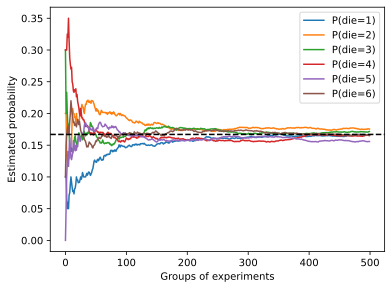

In [45]:
d2l.set_figsize((6,4.5))
# numpy()转换成np数组dfloat32
for i in range(6):
    # 传入数据
    d2l.plt.plot(estimates[:,i].numpy(),
                label=("P(die="+str(i+1)+")"))
# 绘制平行于x轴的水平参考线
d2l.plt.axhline(y=0.167,color="black",linestyle='dashed')
# 设置label
d2l.plt.gca().set_xlabel('Groups of experiments')
d2l.plt.gca().set_ylabel('Estimated probability')
# plt.legend( )创建图例，比plt.show()功能多一点
d2l.plt.legend()